In [25]:
library(itsmr)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyverse)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'forecast'


The following object is masked from 'package:itsmr':

    forecast




In [26]:
valueinvest <- read.csv("ValueInvest_Global_A.csv")
valueinvest$Date <- as.Date(valueinvest$Date, format = "%Y-%m-%d")  # Adjust the format as per your data

head(valueinvest)

,Date,High.price,Low.price,Closing.price
,<date>,<dbl>,<dbl>,<dbl>
1,2000-10-16,119.0,119.0,119.0
2,2000-10-17,122.5,121.5,121.5
3,2000-10-19,121.5,120.5,120.5
4,2000-10-25,123.4,123.4,123.4
5,2000-10-27,123.2,123.2,123.2
6,2000-10-30,122.6,122.0,122.6


In [5]:
nrow(valueinvest)

[1] 5567

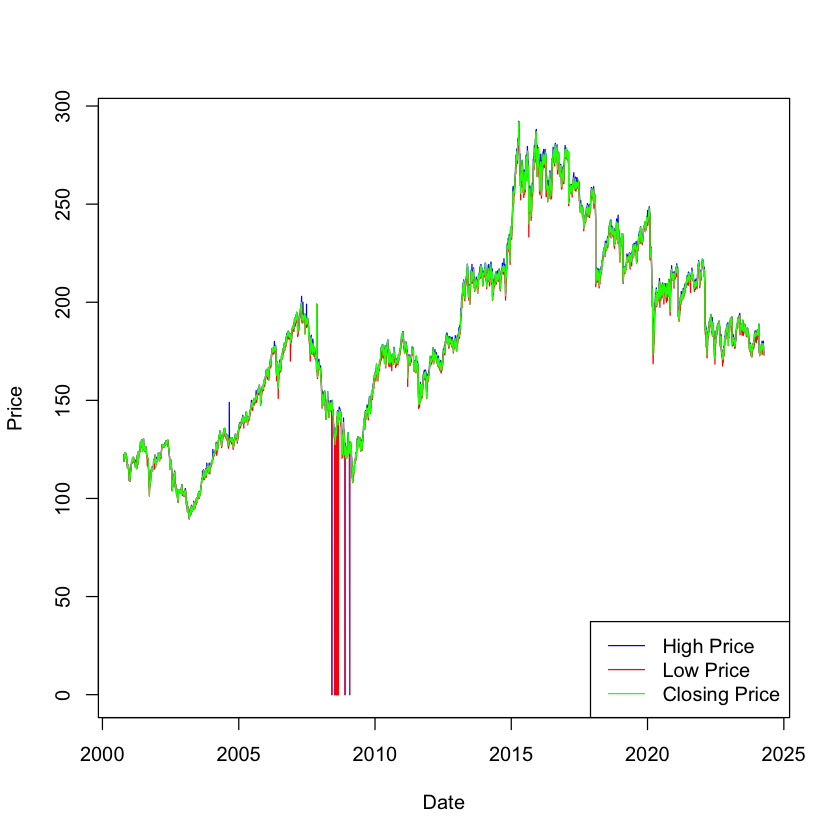

In [27]:
# Plot the first variable
plot(valueinvest$Date, valueinvest$High.price, type = "l", col = "blue", 
     xlab = "Date", ylab = "Price")

# Add lines for the other variables
lines(valueinvest$Date, valueinvest$Low.price, col = "red")
lines(valueinvest$Date, valueinvest$Closing.price, col = "green")

# Add legend
legend("bottomright", legend = c("High Price", "Low Price", "Closing Price"), 
       col = c("blue", "red", "green"), lty = 1)
start_date <- min(date)


In [28]:
date <- valueinvest$Date
start_date <- min(date)
cp_ts <- ts(valueinvest$Closing.price, start=c(start_date), frequency=252)


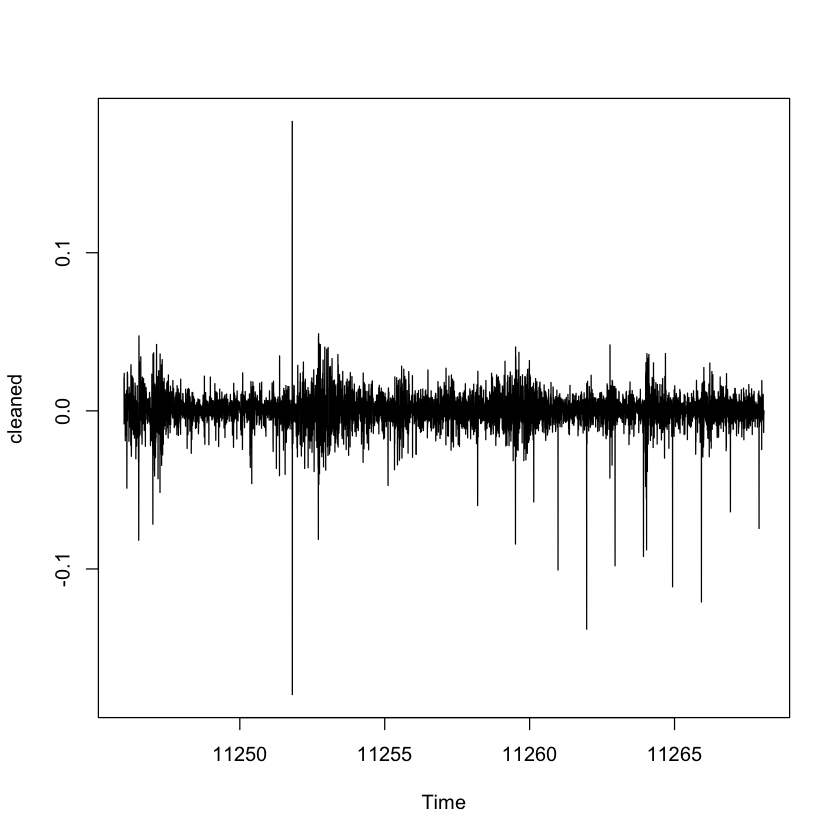

In [29]:
cleaned <- diff(log(cp_ts), lag = 1)
plot(cleaned)

In [31]:
model = auto.arima(log(cp_ts), D=1 )

In [24]:
print(model$coef)

   intercept 
6.800108e-05 
